# Nama  : RM. ARDIANSYAH
# Nim   : 09011281722048
# Kelas : SK5B

# Kanker Otak
Kanker otak adalah kondisi di mana tumbuhnya tumor ganas di otak. Penyakit ini dibagi menjadi dua tipe. Terdiri dari kanker otak primer (terhitung terjadi sebanyak 75 persen dari seluruh kasus tumor otak) yang penyebabnya datang dari otak, dan kanker otak sekunder (25 persen dari seluruh kasus kanker otak) yang muncul dari bagian tubuh lain dan menyebar sampai ke otak. 

Sekitar 40 persen kanker otak diawali dari penyangga neuron yaitu sel tumor Glial. Sel U glial termasuk juga tumor astrocytes, tumor glia primer, oligodendrocytes glioma, meningioma ventricular, dan medulloblastoma. 

Tipe kanker otak sekunder biasanya disebabkan oleh penyebaran dari kanker lain, seperti kanker payudara, paru-paru, ginjal, usus besar, dan melanoma pada kulit.




## Import Library

In [331]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn
import keras

## load data dari dataset

In [332]:
dataset = pd.read_csv("SelKankerOtak.csv")

In [333]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
6        767 non-null int64
148      767 non-null int64
72       767 non-null int64
35       767 non-null int64
0        767 non-null int64
33.6     767 non-null float64
0.627    767 non-null float64
50       767 non-null int64
1        767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


## Menetapkan Data

In [334]:
data_raw = dataset.iloc[:,0:8].values
target = dataset.iloc[:,8].values

In [335]:
dataa=pd.DataFrame(data_raw)
dataa

,0,1,2,3,4,5,6,7
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
5,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
6,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
7,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
8,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0
9,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0


## Preprocessing data.
Preprocessing disini merupakan penskalaan nilai atribut dari data sehingga bisa jatuh pada range tertentu. Metode normalisasi yang digunakan yaitu Min Max, Metode Min-Max merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [336]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [337]:
classifications = 2

## Pembagian atau split data 
Data latih 80% dan data testing 20%

In [338]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=42)

In [339]:
target_real=target_testing

In [340]:
target_training = keras.utils.to_categorical(target_training-1, classifications)
target_testing = keras.utils.to_categorical(target_testing-1, classifications)

## Model ANN  
Model ANN yang digunakan dengan hidden layer 1 dan node pada hidden layer 100, input layer 1 dan node input layer 8. 
Fungsi aktivasi yang digunakan yaitu Relu.

In [341]:
model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dense(classifications, activation='softmax'))

In [342]:
#compile data
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

## Proses Training

In [343]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing),batch_size=16, epochs=150)

Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 10.5088 - acc: 0.3426 - val_loss: 10.0334 - val_acc: 0.3701
Epoch 2/150
613/613 [==============================] - 0s 109us/step - loss: 10.4983 - acc: 0.3426 - val_loss: 10.0201 - val_acc: 0.3701
Epoch 3/150
613/613 [==============================] - 0s 127us/step - loss: 10.4879 - acc: 0.3426 - val_loss: 10.0055 - val_acc: 0.3701
Epoch 4/150
613/613 [==============================] - 0s 129us/step - loss: 10.4585 - acc: 0.3426 - val_loss: 9.9967 - val_acc: 0.3766
Epoch 5/150
613/613 [==============================] - 0s 117us/step - loss: 8.2551 - acc: 0.3736 - val_loss: 3.4013 - val_acc: 0.5390
Epoch 6/150
613/613 [==============================] - 0s 124us/step - loss: 2.2449 - acc: 0.6020 - val_loss: 1.7800 - val_acc: 0.5844
Epoch 7/150
613/613 [==============================] - 0s 122us/step - loss: 1.5584 - acc: 0.6085 - val_loss: 1.3362 - val_acc: 0.5974
Epoc

Epoch 61/150
613/613 [==============================] - 0s 93us/step - loss: 0.5631 - acc: 0.7162 - val_loss: 0.5905 - val_acc: 0.7403
Epoch 62/150
613/613 [==============================] - 0s 96us/step - loss: 0.5755 - acc: 0.7145 - val_loss: 0.5945 - val_acc: 0.7662
Epoch 63/150
613/613 [==============================] - 0s 124us/step - loss: 0.5621 - acc: 0.7096 - val_loss: 0.5856 - val_acc: 0.7532
Epoch 64/150
613/613 [==============================] - 0s 148us/step - loss: 0.5720 - acc: 0.7096 - val_loss: 0.6219 - val_acc: 0.7013
Epoch 65/150
613/613 [==============================] - 0s 143us/step - loss: 0.5758 - acc: 0.7113 - val_loss: 0.5849 - val_acc: 0.7403
Epoch 66/150
613/613 [==============================] - 0s 104us/step - loss: 0.5557 - acc: 0.7194 - val_loss: 0.6030 - val_acc: 0.7468
Epoch 67/150
613/613 [==============================] - 0s 93us/step - loss: 0.5613 - acc: 0.7227 - val_loss: 0.5970 - val_acc: 0.7078
Epoch 68/150
613/613 [=============================

In [344]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

154/154 [==============================] - 0s 52us/step
Akurasi data Testing = 74.68%


## Menampilkan Model Akurasi

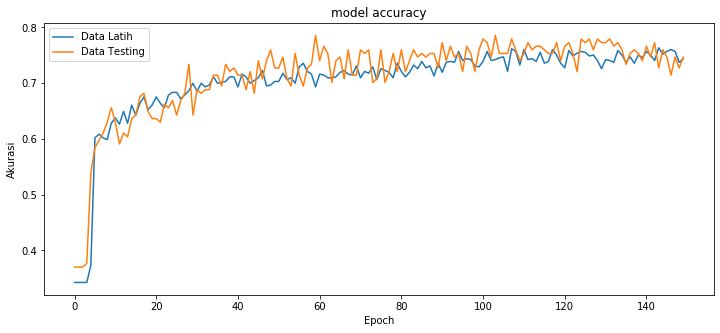

In [345]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history_validasi.history['acc'])
plt.plot(history_validasi.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

## Menampilkan Model loss

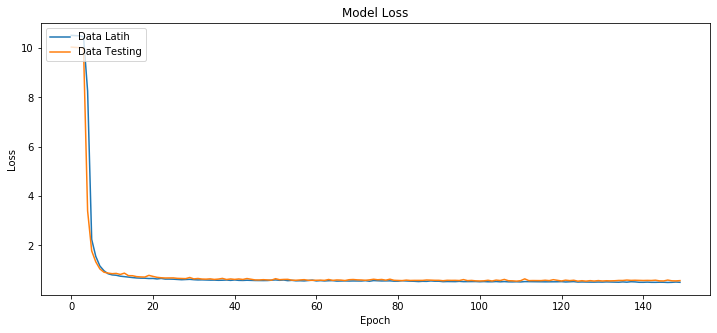

In [346]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

## Confussion Matrix

In [347]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(data_testing)+1
for i in range (len(prediction)):
    if(prediction[i]==2):
        prediction[i]=0
cm = confusion_matrix(target_real, prediction)
cm

array([[76, 21],
       [18, 39]], dtype=int64)

In [348]:
print(target_real)
print(prediction)

[0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 0]
[1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 0]


## Perhitungan
### precision, recall, f1 score, akurasi, spec, Sensitivity

In [352]:
#Label 0
tp = cm[0,0]
tn = cm[1,1] + cm[1,1]  
fp = cm[1,0] + cm[1,0]  
fn = cm[0,1] + cm[0,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.6785714285714286
recall :  0.6440677966101694
F1 :  0.6608695652173914
spec :  0.6842105263157895
sensitivity :  0.6440677966101694
akurasi :  0.6637931034482759


In [353]:
#Label 1
tp = cm[1,1]
tn = cm[0,0] + cm[1,1] 
fp = cm[0,1] + cm[1,1] 
fn = cm[1,0] + cm[1,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.3939393939393939
recall :  0.40625
F1 :  0.4
spec :  0.6571428571428571
sensitivity :  0.40625
akurasi :  0.5682656826568265


In [354]:
from sklearn.metrics import classification_report
print(classification_report(target_real,prediction))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        97
           1       0.65      0.68      0.67        57

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

